In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Путь к папке в архиве
ZIP_PATH = "drive/MyDrive/italy-with-regions.zip!italy-with-regions/"

# Названия для переменных слоев и названия соответствующего shp файла
LAYERS_DICT = {'regions': 'reg2011_g.shp'}

# Подгружаем слои в соответствующие переменные в рамках цикла
i = 0
for layer in LAYERS_DICT.keys():

    path_to_layer = ZIP_PATH + LAYERS_DICT[layer]

    if layer[:8]=='boundary':
        encoding = 'cp1251'
    else:
        encoding = 'utf-8'
    globals()[layer] = gpd.read_file(path_to_layer, encoding=encoding)

    i+=1
    print(f'[{i}/{len(LAYERS_DICT)}] LOADED {layer} WITH ENCODING {encoding}')

[1/1] LOADED regions WITH ENCODING utf-8


<Axes: >

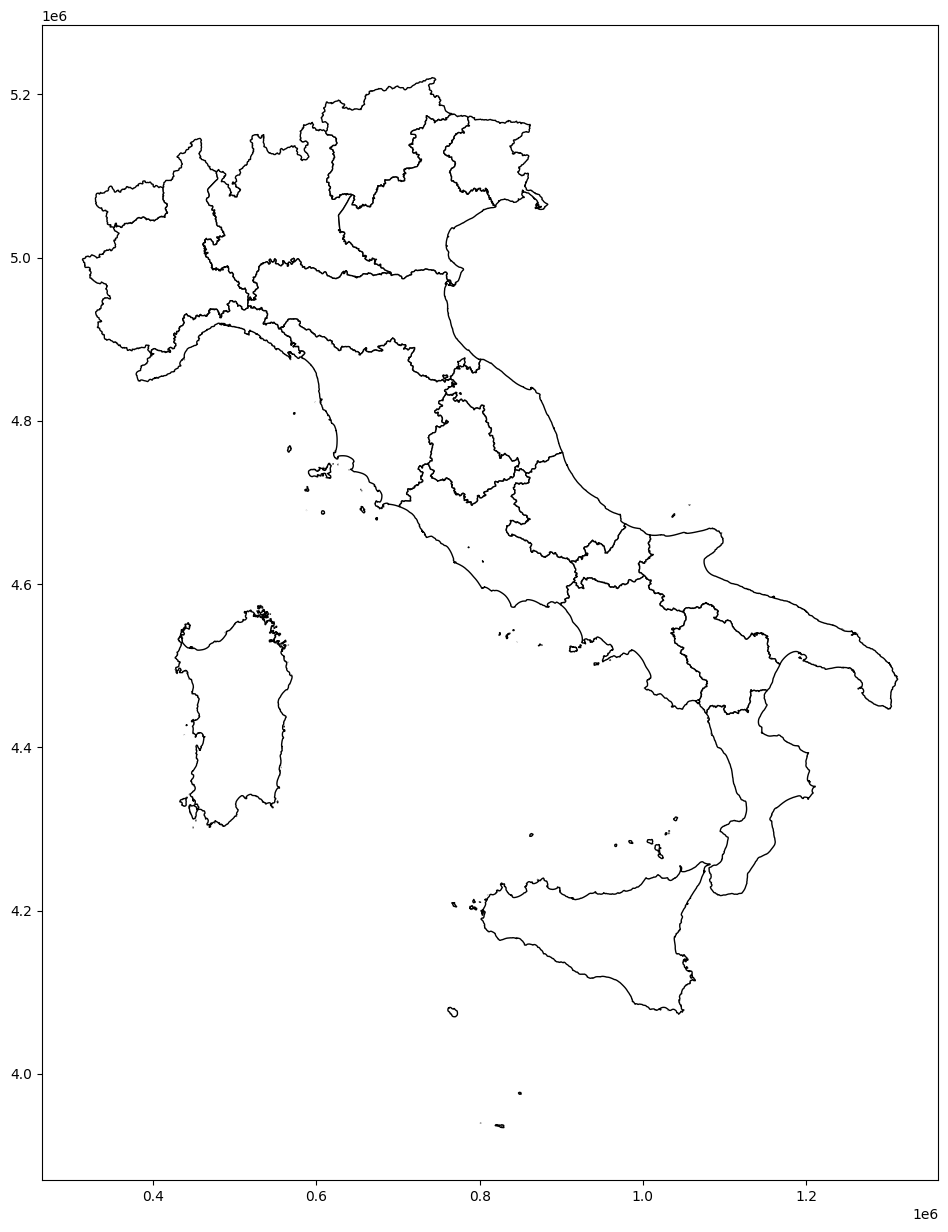

In [3]:
fig, (ax1) = plt.subplots(1, figsize=(15,15))
regions.plot(ax=ax1, color='white', edgecolor='black')

In [4]:
covid = pd.read_csv("drive/MyDrive/Covid.csv")

covid = covid.drop(columns=['Death'])
covid.info()
covid.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NOME_REG   20 non-null     object 
 1   Confirmed  20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 15.7+ KB


,NOME_REG,Confirmed
0,Lombardia,72889.0
1,Piemonte,24832.0
2,Emilia-Romagna,24450.0
3,Veneto,17471.0
4,Toscana,9147.0


In [5]:
regions.info()
regions.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   COD_REG     20 non-null     int64   
 1   NOME_REG    20 non-null     object  
 2   SHAPE_Leng  20 non-null     float64 
 3   SHAPE_Area  20 non-null     float64 
 4   geometry    20 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 928.0+ bytes


,COD_REG,NOME_REG,SHAPE_Leng,SHAPE_Area,geometry
0,1,PIEMONTE,1.236869e+06,2.539410e+10,"POLYGON ((457832.312 5145701.000, 458745.249 5..."
1,2,b'56414c4c45204427414f5354412f56414c4cc9452044...,3.111651e+05,3.259041e+09,"POLYGON ((390734.999 5091965.001, 390830.999 5..."
2,3,LOMBARDIA,1.411265e+06,2.386270e+10,"MULTIPOLYGON (((595736.187 5163715.001, 596126..."
3,4,TRENTINO-ALTO ADIGE/SUDTIROL,8.005341e+05,1.360802e+10,"POLYGON ((743386.080 5219948.900, 743472.190 5..."
4,5,VENETO,1.057856e+06,1.840550e+10,"POLYGON ((768209.001 5175597.001, 768220.251 5..."


In [6]:
regions['NOME_REG'] = regions['NOME_REG'].astype("string")
regions['NOME_REG'] = regions['NOME_REG'].str.lower()
regions.head()

,COD_REG,NOME_REG,SHAPE_Leng,SHAPE_Area,geometry
0,1,piemonte,1.236869e+06,2.539410e+10,"POLYGON ((457832.312 5145701.000, 458745.249 5..."
1,2,b'56414c4c45204427414f5354412f56414c4cc9452044...,3.111651e+05,3.259041e+09,"POLYGON ((390734.999 5091965.001, 390830.999 5..."
2,3,lombardia,1.411265e+06,2.386270e+10,"MULTIPOLYGON (((595736.187 5163715.001, 596126..."
3,4,trentino-alto adige/sudtirol,8.005341e+05,1.360802e+10,"POLYGON ((743386.080 5219948.900, 743472.190 5..."
4,5,veneto,1.057856e+06,1.840550e+10,"POLYGON ((768209.001 5175597.001, 768220.251 5..."


In [7]:
covid['NOME_REG'] = covid['NOME_REG'].astype("string")
covid['NOME_REG'] = covid['NOME_REG'].str.lower()
covid.head()

,NOME_REG,Confirmed
0,lombardia,72889.0
1,piemonte,24832.0
2,emilia-romagna,24450.0
3,veneto,17471.0
4,toscana,9147.0


<Axes: >

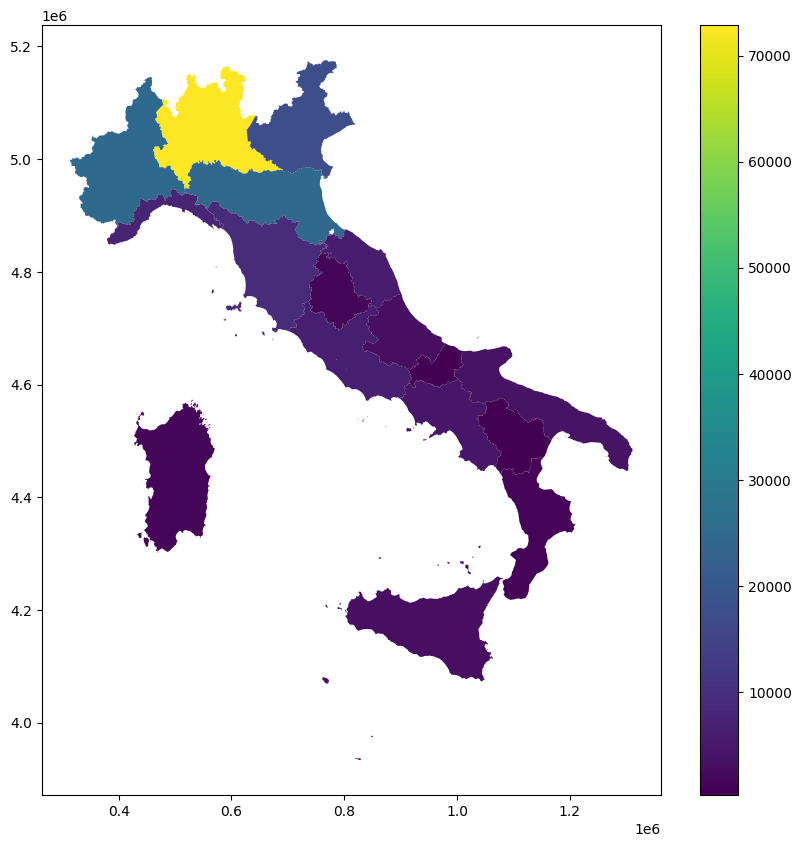

In [8]:
covid_regions = regions.merge(covid, left_on='NOME_REG', right_on='NOME_REG')
covid_regions.head()
# Рисуем тепловую карту
covid_regions.plot(column='Confirmed', legend=True, figsize=(10,10))